# Declaration of Originality

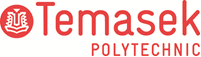

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :   Angel Zafirah   (2402054G)
* Tutorial Group                :   P04
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [15]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame

df = pd.read_csv("Chocolate Sales (2).csv")
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [4]:
## Check for missing data

df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [5]:
## Describe data distribution

df.describe()


,Boxes Shipped
count,3282.000000
mean,164.666971
std,124.024736
min,1.000000
25%,71.000000
50%,137.000000
75%,232.000000
max,778.000000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

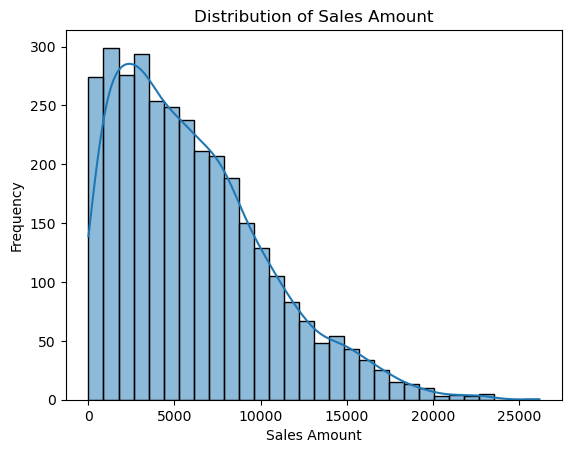

In [ ]:
## Understanding distribution of target

sns.histplot(df["Amount"], bins=30, kde = True)
plt.title("Distribution of Sales Amount")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

### 2.3.1.2 Understanding distribution of features

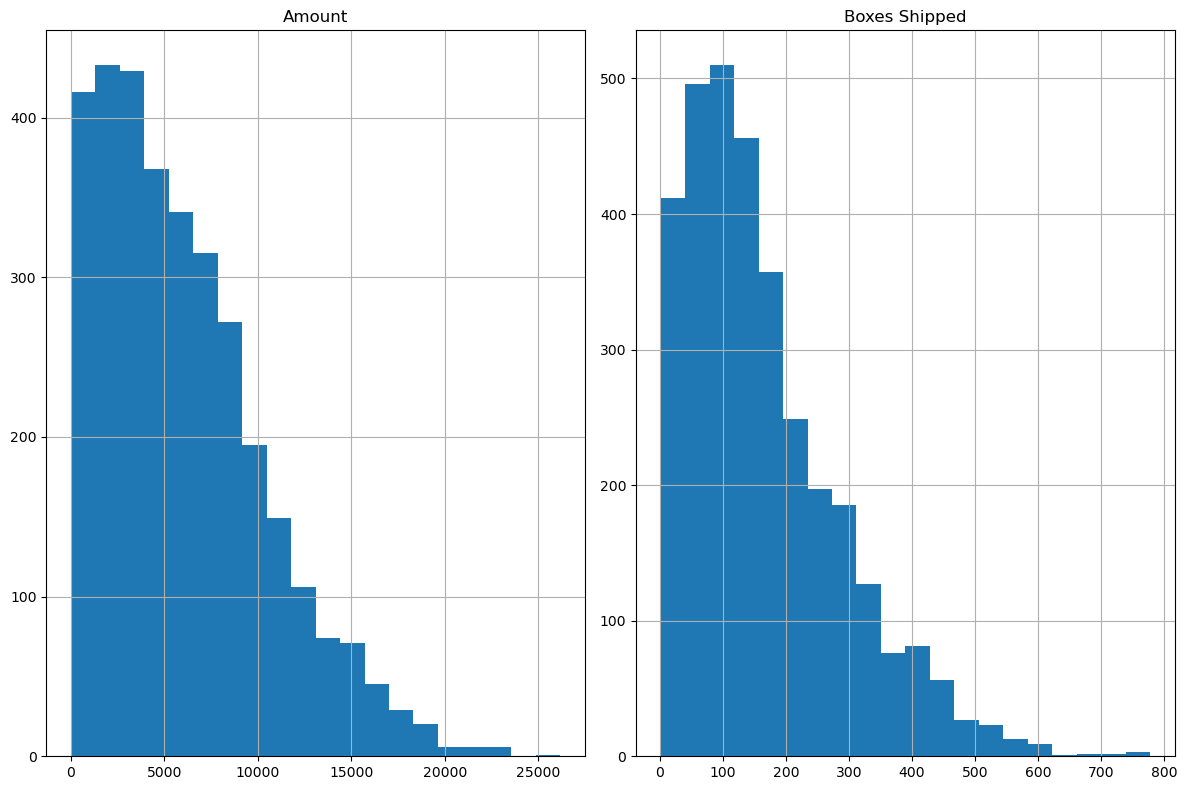

In [17]:
## Understanding distribution of features

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[num_cols].hist(
    bins = 20,
    figsize = (12, 8)
)
plt.tight_layout()
plt.show()

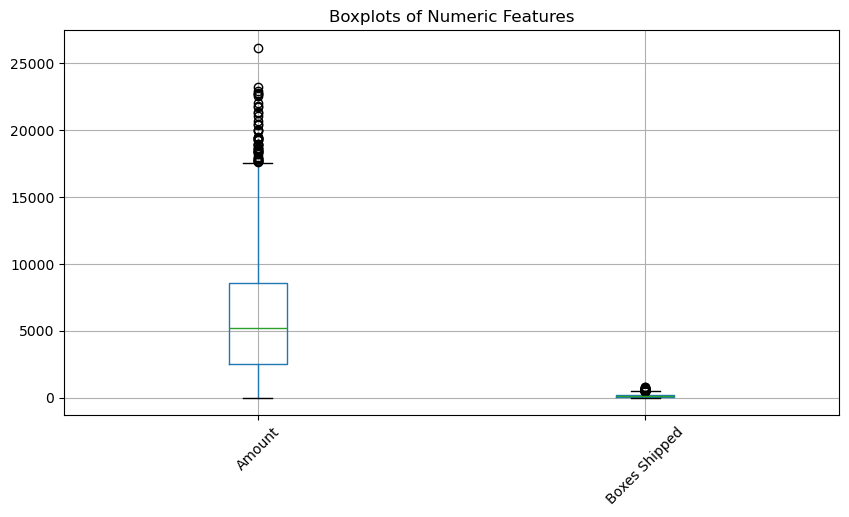

In [18]:
## boplot

df[num_cols].boxplot(
    rot = 45,
    figsize = (10, 5)
)
plt.title("Boxplots of Numeric Features")
plt.show()

### 2.3.2 Understanding relationship between variables

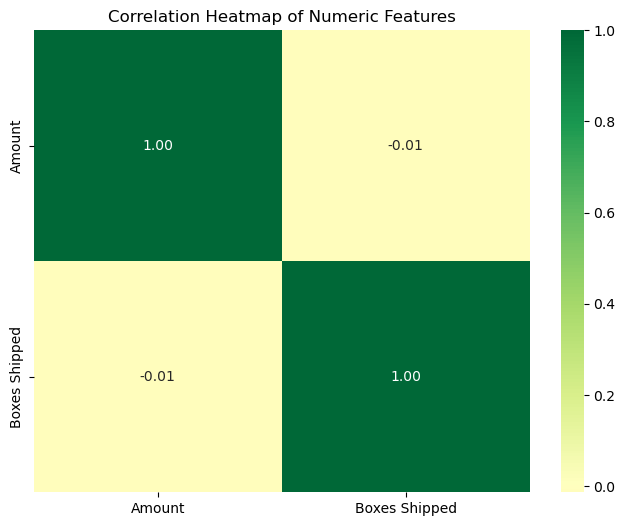

In [21]:
## Understanding relationship between variables

## target vs key feature (boxes shipped)
corr = df[num_cols].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(
    corr,
    cmap = "RdYlGn",
    center = 0,
    annot = True,
    fmt = ".2f"
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

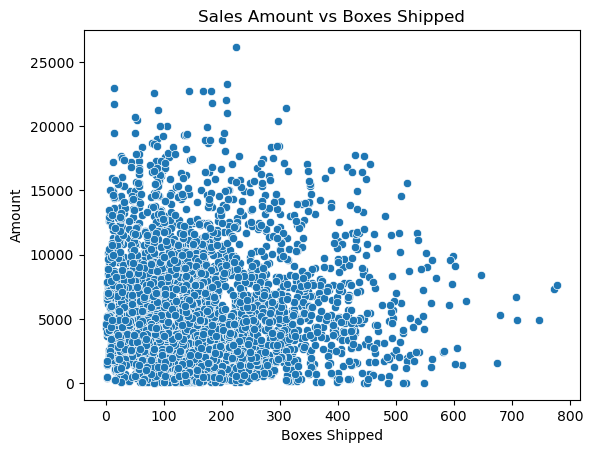

In [22]:
## target vs categorical feature (boxes shipped)

sns.scatterplot(
    data = df,
    x = "Boxes Shipped",
    y = "Amount"
)
plt.title("Sales Amount vs Boxes Shipped")
plt.show()

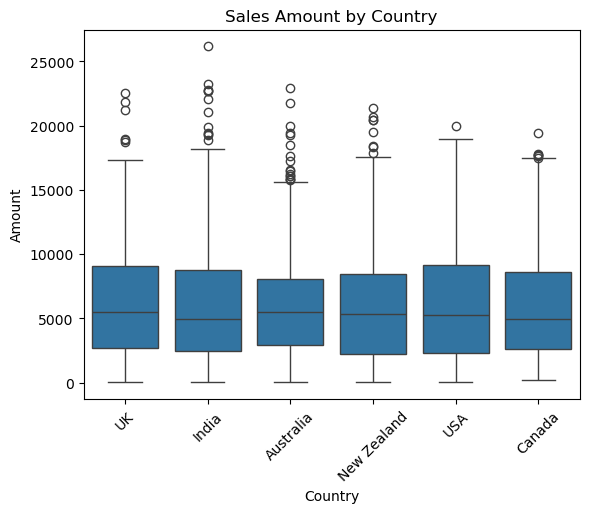

In [23]:
## by coutrny

sns.boxplot(
    data = df,
    x = "Country",
    y = "Amount"
)
plt.xticks(rotation = 45)
plt.title("Sales Amount by Country")
plt.show()

# 3. Data Preparation

## 3.1 Data Cleaning

In [26]:
## Clean data

## verify amt is numeric
df["Amount"].dtype

dtype('float64')

In [30]:
## check dups

df.duplicated().sum()


np.int64(0)

In [31]:
## drop dups
df = df.drop_duplicates()

## 3.2 Train-Test Split

In [32]:
## Split data into train set and test set

# define target and features
col_y = "Amount"
X = df.drop(columns = [col_y])
y = df[col_y]


In [33]:
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size =test_size,
    random_state = random_state
)

# 4. Modelling

### 4.2 Train Model

In [35]:
## Initialise and train model

## identify categorical and numerical columns
from sklearn.compose import ColumnTransformer

cat_cols = X.select_dtypes(include = "object").columns.tolist()
num_cols = X.select_dtypes(include = ["int64", "float64"]).columns.tolist()


In [37]:
## preprocess

from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers = [
        ("cat", OneHotEncoder(handle_unknown = "ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

In [39]:
## initialiese
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators = 200,
    random_state = 42,
    n_jobs = -1
)

In [40]:
## build pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", rf)
])

In [41]:
## train model
pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# 5. Model Evaluation

In [47]:
## Evaluate model

from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

## make predictions
y_pred = pipeline.predict(X_test)

# evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 2234.0165904870623
RMSE: 3138.023206904652
R2 Score: 0.41483851270690686


In [48]:
## New data

## unseen
X_unseen = X.sample(5, random_state = 42)
X_unseen

## Predict sales amount
predictions = pipeline.predict(X_unseen)

X_unseen = X_unseen.copy()
X_unseen["Predicted_Amount"] = predictions
X_unseen


,Sales Person,Country,Product,Date,Boxes Shipped,Predicted_Amount
1657,Madelene Upcott,New Zealand,Peanut Butter Cubes,28/01/2023,340,6169.00235
1298,Mallorie Waber,Canada,85% Dark Bars,20/04/2023,430,2824.01040
2416,Madelene Upcott,USA,Eclairs,18/03/2024,193,7611.64980
1650,Mallorie Waber,Canada,White Choc,03/03/2023,74,4014.61045
2552,Van Tuxwell,USA,Caramel Stuffed Bars,14/02/2024,22,2657.21755


## Iterative model development


In [14]:
## Further feature engineering / feature selection

In [49]:
corr = df.corr(numeric_only=True)
corr_with_target = corr["Amount"].sort_values(ascending = False)
corr_with_target


Amount           1.000000
Boxes Shipped   -0.013154
Name: Amount, dtype: float64

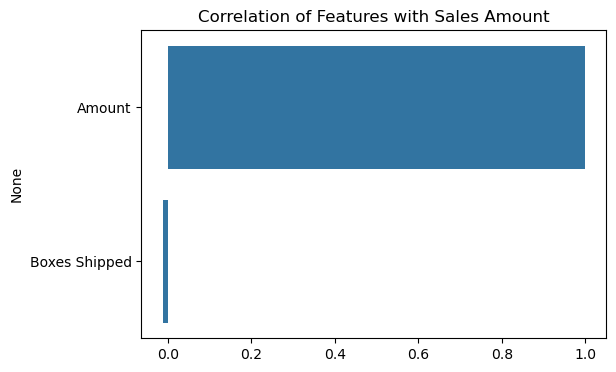

In [51]:
plt.figure(figsize = (6, 4))
sns.barplot(
    x = corr_with_target.values,
    y = corr_with_target.index
)
plt.title("Correlation of Features with Sales Amount")
plt.show()